# Q1
### Sum of reciprocals.

In [9]:
def f(*x,**y): #takes in variable number of arguments

    # x is a tuple of lists. Ex print(x): ([1,2,3,4,5],)
    # *x unpacks it. Ex: print(*x): [1,2,3,4,5]

    def s1(x):
        s = 0
        for i in x:
            s += i
        return s

    def p1(x):
        s = 1
        if x:
            for i in x:
                s*= i
                return s

    #this is the function I added to give the sum of reciprocal
    #using an inline lambda function that maps x to 1/x and uses
    #the existing sum function s1(x)
    def reciprocal(x):
        return s1(list(map(lambda v: 1/v, x)))

    if y["action"] == "sum":
        return s1(*x)
    if y["action"] == "prod":
        return p1(*x)
    if y["action"] == "rec":
        return reciprocal(*x)
    else:
        return f"bad argument: {y}"
                
xlst = [1,2,3,4,5]
print(f(xlst, action = "rec"))

2.283333333333333


# Q2
### Without modifying the functions created in Q1,write a command line argument script to read data from console.
For a standalone script, visit my [github repository](https://github.com/rachithaiyappa/CSB505_AppliedAlgo/tree/master/Assignment_3) 

In [ ]:
import argparse

# --------------------------------------------------------------------
# What are the command line arguments required? 
parser = argparse.ArgumentParser()

parser.add_argument(
    '-n', 
    '--numbers',
    nargs='+', #makes all command line arguments to list 
    help='Numbers separated by spaces',
    required= True,
    )
parser.add_argument(
    '-op',
    "--operation",
    help = "The operation to be performed: sum, prod or rec",
    required= True
    )
# --------------------------------------------------------------------

#Grab command line arguments
args = parser.parse_args()

# Sum, product and reciprocal functions -------------------------------
def f(*x,**y):
    def s1(x):
        s = 0
        if x:
            for i in x:
                s += i
            return s

    def p1(x):
        s = 1
        if x:
            for i in x:
                s*= i
            return s

    def rec(x):
        return s1(list(map(lambda v: 1/v, x)))

    if y["action"] == "sum":
        return s1(*x)
    if y["action"] == "prod":
        return p1(*x)
    if y["action"] == "rec":
        return rec(*x)
    else:
        return f"bad argument: {y}"
# --------------------------------------------------------------------

if __name__ == '__main__':
    # Print the program's result
    print(f(map(int,args.numbers), action = args.operation))
                

# Q3
### Overloading the class asterisk (*) which is an instrinsic operator controlled by the __mul__ method

In [14]:
class complex_:
    def __init__(self, re=0, im=0):
        self.re = re
        self.im = im

    def get_re(self):
        return self.re
        
    def get_im(self):
        return self.im
        
    def __str__(self):
        g = lambda x:"+" if x >= 0 else ""
        return f"({self.re}{g(self.im)}{self.im}i)"

    def __add__(self, other):
        new_re = self.get_re() + other.get_re()
        new_im = self.get_im() + other.get_im()
        return complex_(new_re, new_im)

    #explicit method for addition
    def cadd(self, other):
        new_re = self.get_re() + other.get_re()
        new_im = self.get_im() + other.get_im()
        return complex_(new_re, new_im)

    #explicit method for multiplication
    def cmul(self, other):
        new_re = (self.get_re()*other.get_re()) - (self.get_im()*other.get_im())
        new_im = (self.get_re()*other.get_im()) + (self.get_im()*other.get_re())
        return complex_(new_re, new_im)

    #redefining (overloading) what + means, for this class
    def __add__(self, other):
        new_re = self.get_re() + other.get_re()
        new_im = self.get_im()+ other.get_im()
        return complex_(new_re,new_im)

    
    #redefining (overloading) what * means, for this class
    def __mul__(self, other):
        new_re = (self.get_re()*other.get_re()) - (self.get_im()*other.get_im())
        new_im = (self.get_re()*other.get_im()) + (self.get_im()*other.get_re())
        return complex_(new_re,new_im)

if __name__ =='__main__':
    w = complex_(1,-3)
    x = complex_(-1,3)
    y = complex_(1,3)
    z = complex_(-1,-3)
    print("w = ", w)
    print("x = ", x)
    print("y = ", y)
    print("z = ", z)
    print("\n")

    #Addition
    print("w.cadd(x).cadd(y).cadd(z) = ", w.cadd(x).cadd(y).cadd(z))
    print("Python's own way of (1-3j) + (-1+3j) + (1+3j) + (-1-3j) = ", (1-3j) + (-1+3j) + (1+3j) + (-1-3j))
    print("Class overload: w + x + y + z", w + x + y + z)
    print("\n")

    #Multiplication
    print("w.cmul(x).cmul(y).cmul(z) = ", w.cmul(x).cmul(y).cmul(z))
    print("Python's own way of (1-3j) * (-1+3j) * (1+3j) * (-1-3j) = ", (1-3j) * (-1+3j) * (1+3j) * (-1-3j))
    print("Class overload: w * x * y * z = ", w * x * y * z)

w =  (1-3i)
x =  (-1+3i)
y =  (1+3i)
z =  (-1-3i)


w.cadd(x).cadd(y).cadd(z) =  (0+0i)
Python's own way of (1-3j) + (-1+3j) + (1+3j) + (-1-3j) =  0j
Class overload: w + x + y + z (0+0i)


w.cmul(x).cmul(y).cmul(z) =  (100+0i)
Python's own way of (1-3j) * (-1+3j) * (1+3j) * (-1-3j) =  (100+0j)
Class overload: w * x * y * z =  (100+0i)


# Q4
### Experimental analysis of three functions. 
### Running time as the function of input size

My experimental analysis involved performing the same steps for two different kinds of inputs. For a given input size,  
1. A list of uniformly picked random numbers between 0 and 1,
2. An array of numbers between 1 and 10000

### The log-log charts for both of these different kinds of input are similar and the result does not change. 

## average3 < average2 < average1 in terms of running time

In [15]:
import timeit
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean,stdev
import pickle as pkl


def average1(S):
    #S:sequence
    n = len(S)
    my_average = [0]*n
    for j in range(n):
        total = 0
        for i in range(j + 1):
            total += S[i]
        my_average[j] = total / (j+1)
    return my_average

def average2(S):
    #S:sequence
    n = len(S)
    my_average= [0]*n
    for j in range(n):
        my_average[j] = sum(S[0:j+1]) / (j+1)
    return my_average

def average3(S):
    #S:sequence
    n = len(S)
    my_average = [0]*n
    total = 0
    for j in range(n):
        total += S[j]
        my_average[j] = total / (j+1)
    return my_average

In [16]:
#Creating three dictionaries to store a list of running times (value) 
# for multiple runs of the function with the same input size (key)

#Example of such a dictionary
# S1 = {1:[1,1.5], 10:{11,12}, 100:{50,55}}
# where the keys are various input sizes to the function average1 and the values are the running times 
# for multiple runs of the function

S1, S2, S3 = {},{},{}

#a list of various input sizes.
sizes = [10**i for i in range(1,5)]

for input_size in sizes:
    print(input_size)
    S1[input_size], S2[input_size], S3[input_size] = [], [], []

    #A random array of given input size
    S = np.random.uniform(size=input_size)
    
    for e in range(10): #Running times from 10 runs of the function for any given input size
        starttime = timeit.default_timer()
        average1(S)
        #Time taken for average1 to to run, given S
        S1[input_size].append(timeit.default_timer() - starttime)

        starttime = timeit.default_timer()
        average2(S)
        #Time taken for average2 to to run, given S
        S2[input_size].append(timeit.default_timer() - starttime)

        starttime = timeit.default_timer()
        average3(S)
         #Time taken for average3 to to run, given S
        S3[input_size].append(timeit.default_timer() - starttime)

10
100
1000
10000


In [19]:
#Storing the dictionary to a pkl file my local machine since it takes long if I need to rerun the code.
with open('runtime_randomunifrom_0to1.pkl','wb') as f:
    pkl.dump([S1,S2,S3],f)

#Loading the pickle file if necessary.
# with open('runtime.pkl','rb') as f:
#     S1,S2,S3 = pkl.load(f)

Text(0.5, 0, 'Input size')

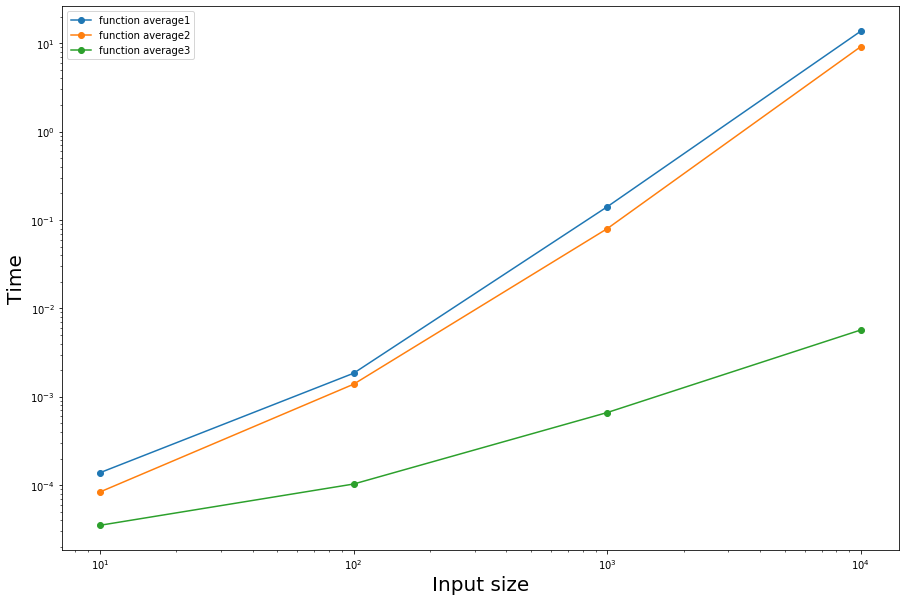

In [18]:
#Visualising the run times of the functions for various input sizes on a log-log chart.

#Plotting the AVERAGE running times
plt.figure(figsize=(15, 10))
plt.plot(list(S1.keys()),[mean(S1[n]) for n in S1],'o-',label='function average1')
plt.plot(list(S2.keys()),[mean(S2[n]) for n in S2],'o-',label='function average2')
plt.plot(list(S3.keys()),[mean(S3[n]) for n in S3],'o-',label='function average3')
plt.legend()

plt.xscale('log')
plt.yscale('log')
plt.ylabel("Time",size=20)
plt.xlabel("Input size",size=20)


In [20]:
# Creating three dictionaries to store a list of running times (value) 
# for multiple runs of the function with the same input size (key)

#Example of such a dictionary
# S1 = {1:[1,1.5], 10:{11,12}, 100:{50,55}}
# where the keys are various input sizes to the function average1 and the values are the running times 
# for multiple runs of the function

S1, S2, S3 = {},{},{}

#a list of various input sizes.
sizes = [10**i for i in range(1,5)]

for input_size in sizes:
    print(input_size)
    S1[input_size], S2[input_size], S3[input_size] = [], [], []

    #A random array of given input size
    S = np.linspace(1,100000,int(input_size))
    
    for e in range(10): #Running times from 10 runs of the function for any given input size
        starttime = timeit.default_timer()
        average1(S)
        #Time taken for average1 to to run, given S
        S1[input_size].append(timeit.default_timer() - starttime)

        starttime = timeit.default_timer()
        average2(S)
        #Time taken for average2 to to run, given S
        S2[input_size].append(timeit.default_timer() - starttime)

        starttime = timeit.default_timer()
        average3(S)
         #Time taken for average3 to to run, given S
        S3[input_size].append(timeit.default_timer() - starttime)

10
100
1000
10000


In [21]:
#Storing the dictionary to a pkl file my local machine since it takes long if I need to rerun the code.
with open('runtime_nplinspace_1to100000.pkl','wb') as f:
    pkl.dump([S1,S2,S3],f)

#Loading the pickle file if necessary.
# with open('runtime.pkl','rb') as f:
#     S1,S2,S3 = pkl.load(f)

Text(0.5, 0, 'Input size')

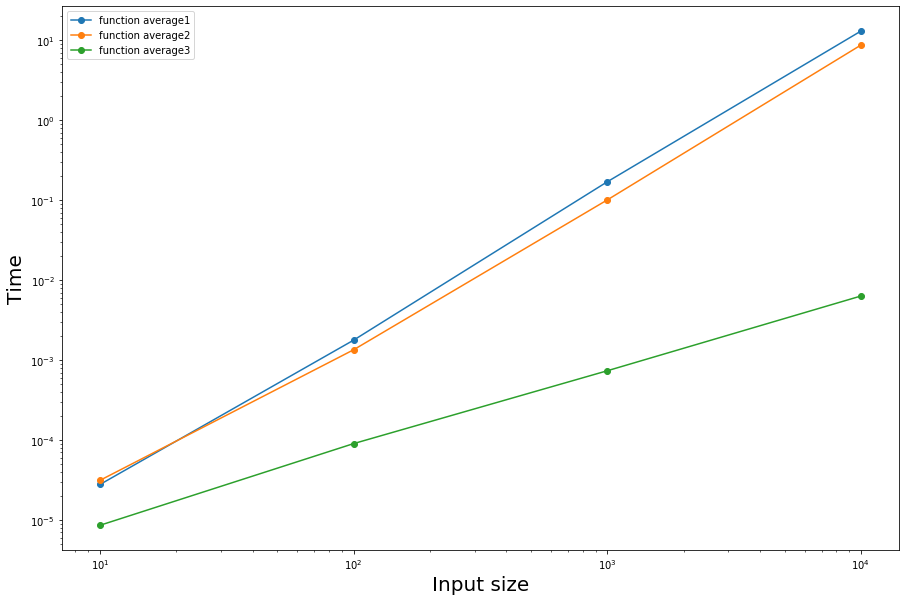

In [22]:
# Visualising the run times of the functions for various input sizes on a log-log chart.

#Plotting the AVERAGE running times
plt.figure(figsize=(15, 10))
plt.plot(list(S1.keys()),[mean(S1[n]) for n in S1],'o-',label='function average1')
plt.plot(list(S2.keys()),[mean(S2[n]) for n in S2],'o-',label='function average2')
plt.plot(list(S3.keys()),[mean(S3[n]) for n in S3],'o-',label='function average3')
plt.legend()

plt.xscale('log')
plt.yscale('log')
plt.ylabel("Time",size=20)
plt.xlabel("Input size",size=20)


# Q5.
### Experimental Analysis to show the maximum input size which can be processed by each of the functions within 45 seconds

Similar to Q4, my experimental analysis involved performing the same steps for two different kinds of inputs. For a given input size,  
1. A list of uniformly picked random numbers between 0 and 1,
2. An array of numbers between 1 and 10000000

---
## Results 

* ### Maximum input size for both kinds of input for algorithm1 is approx. 1500  


* ### Maximum input size for both kinds of input for algorithm3 is 27  


* ### Maximum input size for algorithm2 for input kind 1. is 20000000. However, maximum input size algorithm2 for input kind 2. is 10 times greater, of the order 100000000. 

*I adopted a trial and error strategy to get the maximum size of input and save computing power, instead of having to run through a range of input sizes whose bounds are not a-priori known. There are also few stochastic fluctuations in the time when the same input size is run multiple times. But the **order** of magnitude of allowed input sizes does not chnage*


In [26]:
def algorithm1(S):
    #S:sequence
    for j in range(len(S)):
        for k in range(j+1, len(S)):
            if S[j] == S[k]:
                return False
    return True

def algorithm2(S):
    #S:sequence
    S = sorted(S)
    for j in range(1, len(S)):
        if S[j-1] == S[j]:
            return False
    return True

def algorithm3(S, start, stop):
    #slice S[start:stop], S:sequence
    if stop - start <= 1: return True
    elif not algorithm3(S, start, stop-1): return False
    elif not algorithm3(S, start+1, stop): return False
    else: return S[start] != S[stop-1]

In [41]:
s = 17000
S = np.random.uniform(size=s)
starttime = timeit.default_timer()
algorithm1(S)
print(f"Maximum input size of an array"
        f"of uniform random numbers between 0 and 1 which algorithm 1 can handle is approximately (of the order) {s} " 
        f"and it takes {timeit.default_timer() - starttime} seconds")

S = np.linspace(1,10000000,s)
starttime = timeit.default_timer()
algorithm1(S)
print(f"Maximum input size of an array"
        f" of numbers between 1 and 10000000 which algorithm 1 can handle is approximately (of the order) {s} " 
        f"and it takes {timeit.default_timer() - starttime} seconds")

Maximum input size of an arrayof uniform random numbers between 0 and 1 which algorithm 1 can handle is approximately (of the order) 17000 and it takes 44.5550029369997 seconds
Maximum input size of an array of numbers between 1 and 10000000 which algorithm 1 can handle is approximately (of the order) 17000 and it takes 44.29526836600053 seconds


In [31]:
s = 20000000
S = np.random.uniform(size=s)
starttime = timeit.default_timer()
algorithm2(S)
print(f"Maximum input size of an array"
        f" of uniform random numbers between 0 and 1 which algorithm 2 can handle is approximately (of the order) {s} " 
        f"and it takes {timeit.default_timer() - starttime} seconds")

s = 100000000
S = np.linspace(1,10000000,s)
starttime = timeit.default_timer()
algorithm2(S)
print(f"Maximum input size of an array"
        f" of numbers between 1 and 10000000 which algorithm 2 can handle is approximately (of the order) {s} " 
        f"and it takes {timeit.default_timer() - starttime} seconds")

Maximum input size of an array of uniform random numbers between 0 and 1 which algorithm 2 can handle is approximately (of the order) 20000000 and it takes 42.96714609499986 seconds
Maximum input size of an array of numbers between 1 and 10000000 which algorithm 2 can handle is approximately (of the order) 100000000 and it takes 38.26476643099977 seconds


In [35]:
s = 27
S = np.random.uniform(size=s)
starttime = timeit.default_timer()
algorithm3(S,0,s)
print(f"Maximum input size of an array"
        f" of uniform random numbers between 0 and 1 which algorithm 2 can handle is approximately {s} " 
        f"and it takes {timeit.default_timer() - starttime} seconds")


s = 27
S = np.linspace(1,10000000,s)
starttime = timeit.default_timer()
algorithm3(S,0,s)
print(f"Maximum input size of an array"
        f"of numbers between 1 and 10000000 which algorithm 3 can handle is approximately {s} " 
        f"and it takes {timeit.default_timer() - starttime} seconds")



Maximum input size of an array of uniform random numbers between 0 and 1 which algorithm 2 can handle is approximately 27 and it takes 40.40893075000031 seconds
Maximum input size of an arrayof numbers between 1 and 10000000 which algorithm 3 can handle is approximately 27 and it takes 42.86724907400048 seconds
